In [26]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import matplotlib.dates as mdates

%matplotlib inline

In [27]:
raw_data = pd.read_csv('./raw_data.csv')

data = raw_data.copy()
var_list = data.columns[2:]
for var in var_list:
    data.loc[:, var] = data.loc[:, var].str.strip("%").astype(float)

data.loc[:, 'observation_date'] = pd.to_datetime(data.loc[:, 'observation_date'], format="%Y-%m-%d")

In [28]:
data.to_csv('./processed_data.csv', index=False)

In [29]:
data = data.set_index('observation_date')

In [30]:
data.head()

,CPIAUCNS,GS10,GS5,GS30,GS2,GS1M,GS20,GS3M,GS3,FII5,GS7,FII30,GS1,GS5-FII5
observation_date,,,,,,,,,,,,,,
1953-04-01,26.6,2.83,2.62,NaN,NaN,NaN,3.08,NaN,2.51,NaN,NaN,NaN,2.36,NaN
1953-05-01,26.7,3.05,2.87,NaN,NaN,NaN,3.18,NaN,2.72,NaN,NaN,NaN,2.48,NaN
1953-06-01,26.8,3.11,2.94,NaN,NaN,NaN,3.21,NaN,2.74,NaN,NaN,NaN,2.45,NaN
1953-07-01,26.8,2.93,2.75,NaN,NaN,NaN,3.12,NaN,2.62,NaN,NaN,NaN,2.38,NaN
1953-08-01,26.9,2.95,2.80,NaN,NaN,NaN,3.10,NaN,2.58,NaN,NaN,NaN,2.28,NaN


In [31]:
data = data.iloc[:, 0]

In [32]:
data.name = 'inflation'

In [33]:
data = data.to_frame()

In [38]:
data.head()

,inflation
observation_date,
1953-04-01,26.6
1953-05-01,26.7
1953-06-01,26.8
1953-07-01,26.8
1953-08-01,26.9


# Fitting to AR(p)

## Varying p and train size

<b>Use first 400 entries for training, rest for prediction. p-range = 1 ~ 10</b>

p=1 parameters const          -0.189208
L1.inflation    1.008807
dtype: float64
p=2 parameters const          -0.067488
L1.inflation    1.612979
L2.inflation   -0.609691
dtype: float64
p=3 parameters const          -0.042424
L1.inflation    1.464340
L2.inflation   -0.199358
L3.inflation   -0.262784
dtype: float64
p=4 parameters const          -0.042424
L1.inflation    1.464340
L2.inflation   -0.199358
L3.inflation   -0.262784
dtype: float64
p=5 parameters const          -0.024822
L1.inflation    1.451046
L2.inflation   -0.233187
L3.inflation   -0.218152
L4.inflation    0.132123
L5.inflation   -0.130346
dtype: float64
p=6 parameters const          -0.024822
L1.inflation    1.451046
L2.inflation   -0.233187
L3.inflation   -0.218152
L4.inflation    0.132123
L5.inflation   -0.130346
dtype: float64
p=7 parameters const          -0.024822
L1.inflation    1.451046
L2.inflation   -0.233187
L3.inflation   -0.218152
L4.inflation    0.132123
L5.inflation   -0.130346
dtype: float64
p=8 parameters 

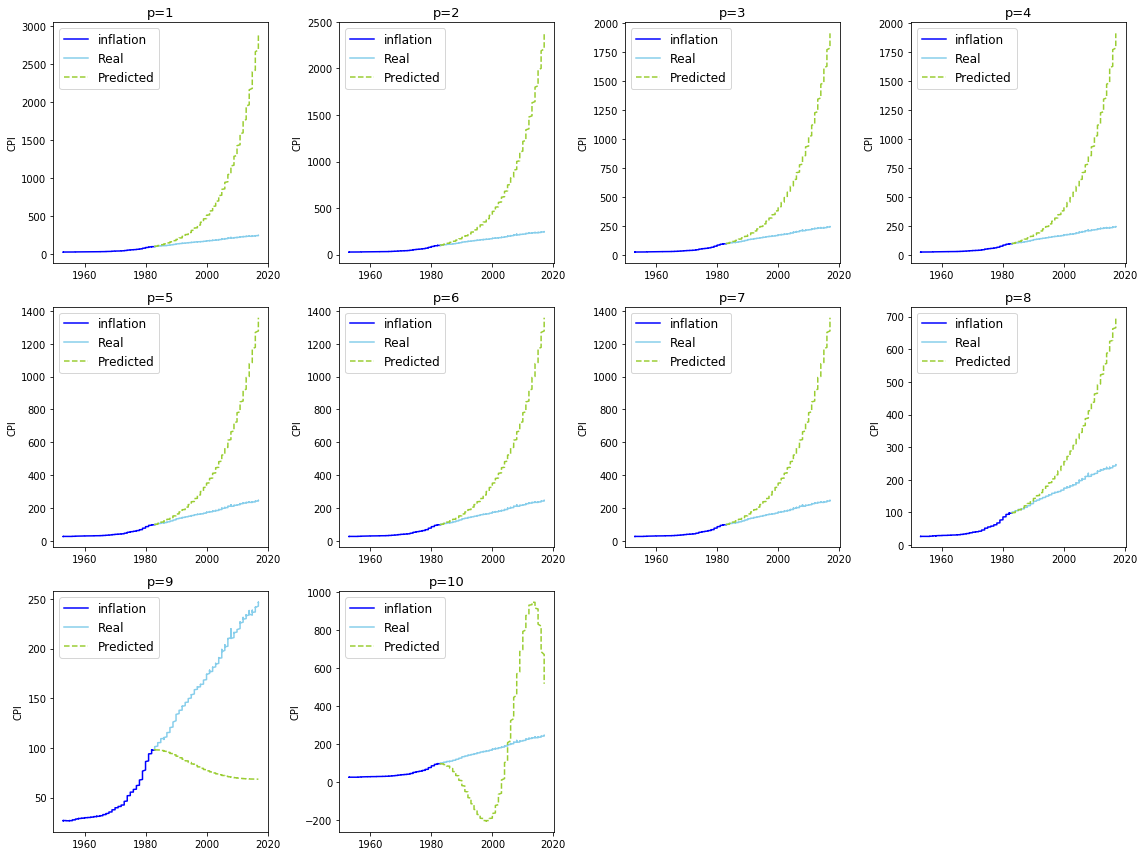

In [41]:
cutoff = 360
fig = plt.figure(figsize=(16, 12))
for i in range(1, 11):
    d1 = data['inflation'].iloc[:cutoff]
    d2 = data['inflation'].iloc[cutoff:]
    start = d2.index[0]
    end = d2.index[-2]
    
    model = smt.AR(d1, dates=d1.index)
    fit_model = model.fit(maxlag=i, ic='aic', trend='c', maxiter=200)
    prediction = fit_model.predict(start=start, end=end)
    
    ax = fig.add_subplot(3, 4, i)
    ax.plot(d1.index.year, d1, color='blue')
    ax.plot(d2.index.year, d2, color='skyblue', label='Real')
    ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
    ax.legend(loc='upper left', fontsize=12)
    ax.set_title('p=%d' % i, fontsize=13)
    ax.set_ylabel('CPI')
    
    print('p=%d parameters' % i, fit_model.params)
    
plt.tight_layout()

<b>Use first 480 entries for training, rest for prediction. p-range = 1 ~ 10</b>

p=1 parameters const           0.004425
L1.inflation    1.003816
dtype: float64
p=2 parameters const           0.003405
L1.inflation    1.589444
L2.inflation   -0.587889
dtype: float64
p=3 parameters const           0.003576
L1.inflation    1.495180
L2.inflation   -0.332282
L3.inflation   -0.161605
dtype: float64
p=4 parameters const           0.004197
L1.inflation    1.479434
L2.inflation   -0.364429
L3.inflation   -0.015931
L4.inflation   -0.097919
dtype: float64
p=5 parameters const           0.004534
L1.inflation    1.468215
L2.inflation   -0.366393
L3.inflation   -0.061165
L4.inflation    0.081595
L5.inflation   -0.121254
dtype: float64
p=6 parameters const           0.005513
L1.inflation    1.458947
L2.inflation   -0.361050
L3.inflation   -0.064876
L4.inflation    0.051046
L5.inflation   -0.001287
L6.inflation   -0.081883
dtype: float64
p=7 parameters const           0.005513
L1.inflation    1.458947
L2.inflation   -0.361050
L3.inflation   -0.064876
L4.inflation    0.051046
L5.in

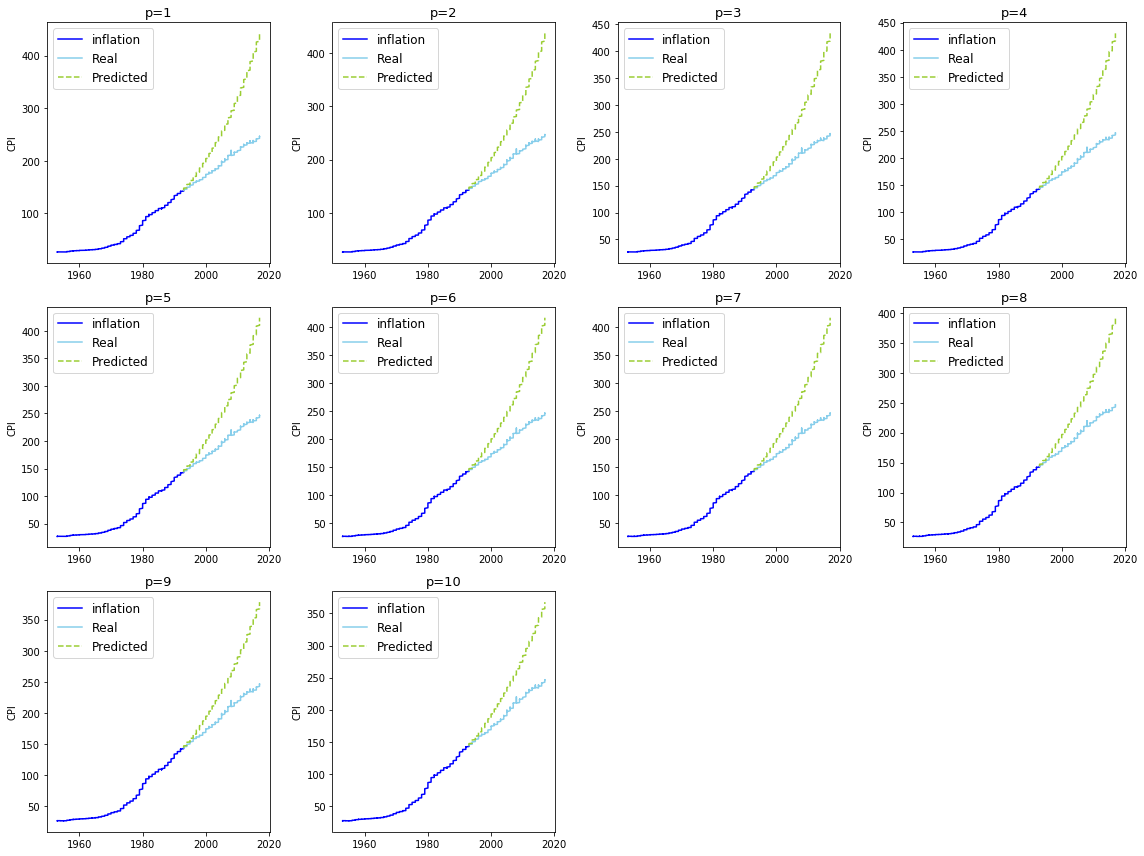

In [42]:
cutoff = 480
fig = plt.figure(figsize=(16, 12))
for i in range(1, 11):
    d1 = data['inflation'].iloc[:cutoff]
    d2 = data['inflation'].iloc[cutoff:]
    start = d2.index[0]
    end = d2.index[-2]
    
    model = smt.AR(d1, dates=d1.index)
    fit_model = model.fit(maxlag=i, ic='aic', maxiter=200)
    prediction = fit_model.predict(start=start, end=end)
    
    ax = fig.add_subplot(3, 4, i)
    ax.plot(d1.index.year, d1, color='blue')
    ax.plot(d2.index.year, d2, color='skyblue', label='Real')
    ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
    ax.legend(loc='upper left', fontsize=12)
    ax.set_title('p=%d' % i, fontsize=13)
    ax.set_ylabel('CPI')

    print('p=%d parameters' % i, fit_model.params)
    
plt.tight_layout()

<b>Use first 600 entries for training, rest for prediction. p-range = 1 ~ 10</b>

p=1 parameters const           0.086859
L1.inflation    1.002127
dtype: float64
p=2 parameters const           0.043489
L1.inflation    1.504252
L2.inflation   -0.503189
dtype: float64
p=3 parameters const           0.043489
L1.inflation    1.504252
L2.inflation   -0.503189
dtype: float64
p=4 parameters const           0.037711
L1.inflation    1.481633
L2.inflation   -0.493165
L3.inflation    0.119282
L4.inflation   -0.106837
dtype: float64
p=5 parameters const           0.032912
L1.inflation    1.466572
L2.inflation   -0.479472
L3.inflation    0.056545
L4.inflation    0.095528
L5.inflation   -0.138385
dtype: float64
p=6 parameters const           0.029999
L1.inflation    1.450208
L2.inflation   -0.470034
L3.inflation    0.061861
L4.inflation    0.041919
L5.inflation    0.041560
L6.inflation   -0.124829
dtype: float64
p=7 parameters const           0.028247
L1.inflation    1.442312
L2.inflation   -0.467639
L3.inflation    0.063798
L4.inflation    0.045131
L5.inflation    0.013158
L6.in

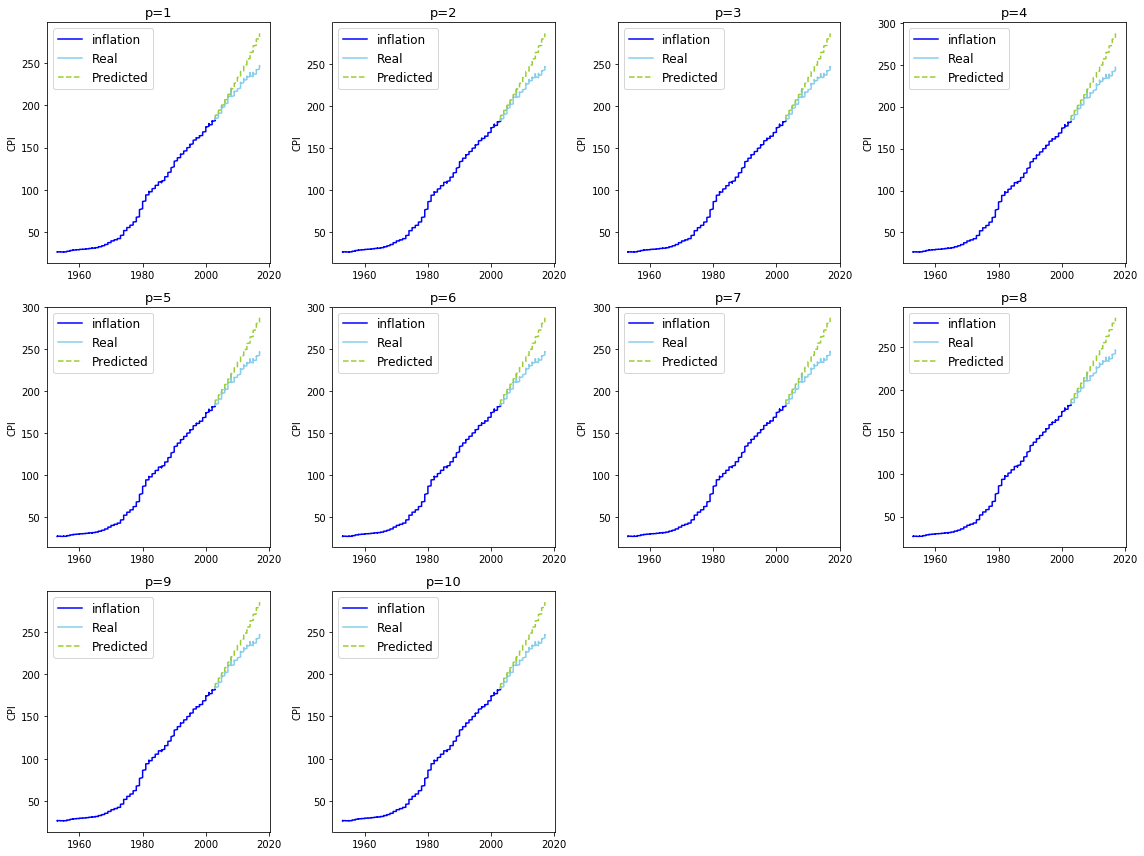

In [43]:
cutoff = 600
fig = plt.figure(figsize=(16, 12))
for i in range(1, 11):
    d1 = data['inflation'].iloc[:cutoff]
    d2 = data['inflation'].iloc[cutoff:]
    start = d2.index[0]
    end = d2.index[-2]
    
    model = smt.AR(d1, dates=d1.index)
    fit_model = model.fit(maxlag=i, ic='aic', maxiter=200)
    prediction = fit_model.predict(start=start, end=end)
    
    ax = fig.add_subplot(3, 4, i)
    ax.plot(d1.index.year, d1, color='blue')
    ax.plot(d2.index.year, d2, color='skyblue', label='Real')
    ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
    ax.legend(loc='upper left', fontsize=12)
    ax.set_title('p=%d' % i, fontsize=13)
    ax.set_ylabel('CPI')

    print('p=%d parameters' % i, fit_model.params)
plt.tight_layout()

## Varying train size with whatever model the algorithm picks

p=0 parameters const            0.055109
L1.inflation     1.383635
L2.inflation    -0.179056
L3.inflation    -0.200466
L4.inflation     0.129014
L5.inflation    -0.113942
L6.inflation    -0.166542
L7.inflation     0.189293
L8.inflation     0.083150
L9.inflation     0.112371
L10.inflation   -0.257478
L11.inflation    0.129156
L12.inflation   -0.021981
L13.inflation   -0.168152
L14.inflation   -0.099098
L15.inflation    0.314918
L16.inflation   -0.136364
dtype: float64
p=1 parameters const            0.013055
L1.inflation     1.415229
L2.inflation    -0.328099
L3.inflation    -0.112951
L4.inflation     0.074264
L5.inflation     0.001414
L6.inflation    -0.140962
L7.inflation     0.257457
L8.inflation    -0.106820
L9.inflation    -0.000310
L10.inflation   -0.049130
L11.inflation    0.025037
L12.inflation    0.143064
L13.inflation   -0.266403
L14.inflation   -0.032413
L15.inflation    0.235268
L16.inflation   -0.114380
dtype: float64
p=2 parameters const            0.021618
L1.inflation   

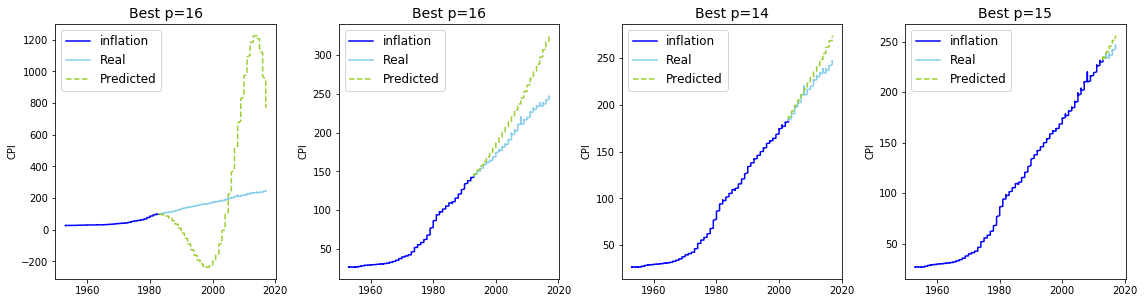

In [45]:
cutoffs = np.array([30, 40, 50, 60]) * 12
fig = plt.figure(figsize=(16, 8))
for i, cutoff in enumerate(cutoffs):
    d1 = data['inflation'].iloc[:cutoff]
    d2 = data['inflation'].iloc[cutoff:]
    start = d2.index[0]
    end = d2.index[-2]
    
    model = smt.AR(d1, dates=d1.index)
    fit_model = model.fit(ic='aic', maxiter=200)
    prediction = fit_model.predict(start=start, end=end)
    
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(d1.index.year, d1, color='blue')
    ax.plot(d2.index.year, d2, color='skyblue', label='Real')
    ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
    ax.legend(loc='upper left', fontsize=12)
    ax.set_title('Best p=%d' % (fit_model.k_ar), fontsize=14)
    ax.set_ylabel('CPI')

    print('p=%d parameters' % i, fit_model.params)
plt.tight_layout()

# Prediction for 1990 and later

In [ ]:
fig = plt.figure(figsize=(6, 6))
d1 = data['inflation'].iloc[114:154]
d2 = data['inflation'].iloc[154:]
start = d2.index[0]
end = d2.index[-2]

model = smt.AR(d1, dates=d1.index)
fit_model = model.fit(ic='aic', maxiter=200)
prediction = fit_model.predict(start=start, end=end)

ax = fig.add_subplot(1, 1, 1)
ax.plot(d1.index.year, d1, color='blue')
ax.plot(d2.index.year, d2, color='skyblue', label='Real')
ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
ax.legend(loc='upper left', fontsize=12)
ax.set_title('Best p=%d' % (fit_model.k_ar), fontsize=14)
ax.set_ylabel('CPI')

print('p=%d parameters' % i, fit_model.params)

# Prediction for 2001 and later

In [ ]:
fig = plt.figure(figsize=(6, 6))
d1 = data['inflation'].iloc[114:174]
d2 = data['inflation'].iloc[174:]
start = d2.index[0]
end = d2.index[-2]

model = smt.AR(d1, dates=d1.index)
fit_model = model.fit(ic='aic', maxiter=200)
prediction = fit_model.predict(start=start, end=end)

ax = fig.add_subplot(1, 1, 1)
ax.plot(d1.index.year, d1, color='blue')
ax.plot(d2.index.year, d2, color='skyblue', label='Real')
ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
ax.legend(loc='upper left', fontsize=12)
ax.set_title('Best p=%d' % (fit_model.k_ar), fontsize=14)
ax.set_ylabel('CPI')

print('p=%d parameters' % i, fit_model.params)